# Linear Regression to Predict House Prices

## Author - Catalina Ifrim



In [ ]:
"""
UW DATASCI410-Methods for Data Analysis
Milestone3-Linear Regression

"""

### Introduction

The EDA and Hypothesis Testing results for housing dataset, obtained in previous milestones were used for building predictive 
regression models. The project includes selecting the features, building the initial model and improving it by applying 
feature engineering techniques, then buiding other types of regression models.

Building the models was an iterative process. The **initial linear regression model** for predicting house prices was built based on
features identified during EDA. Trying to **improve the model**, were built two other models by **adding new features** obtained 
using **feature engineering** techniques. There were built also a couple of other models using **regularization techniques** 
(**Lasso and Ridge regression**).

### Dataset information

The dataset "kc_house_data.csv" contains house sale prices for King County, including Seattle for houses sold between May 2014
and May 2015. The dataset is located at: https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv. 
There are 21613 observations in the dataset and 20 attributes. Each entry contains information about house characteristics.

Attribute information:

- id: Unique identifier for the house
- date: Date when house was sold
- price: House price
- bedrooms: Number of bedrooms
- bathrooms: Number of bathrooms
- sqft_living: Square footage of the home 
- sqft_lot: Square footage of the lot
- floors: Number of floors (levels) in the house
- waterfront: House which has a view to a waterfront
- view: Has been viewed
- condition: How good the condition is (overall). It is coded on a 1-5 scale, with 1 being "poor" and 5 being "very good". 
- grade: Overall grade given to the housing unit, based on King County grading system. The grade refers to the design and 
quality of the construction.
- sqft_above: Square footage of the house apart from basement
- sqft_basement: Square footage of the basement
- yr_built: Built year
- yr_renovated: Year when house was renovated
- zipcode: Zipcode of the house location
- lat: Latitude coordinate
- long: Longitude coordinate
- sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15: The square footage of the land lots of the nearest 15 neighbors 

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as sm
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

%matplotlib inline

### Load Data

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv'
house_price = pd.read_csv(filename)

In [3]:
# Print the shape and the first few rows
print(house_price.shape)
house_price.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Observations regarding the dataset:

- There are more than 21613 entries in the dataset.
- There are 20 columns most of them containing numeric data, either floating point number (float64) or integer (int64). Only 
the column 'date' is of type "object".

In [4]:
# Display summary statistics
house_price.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From the summary statistics can be observed some useful information:

- The average price value is ~540,088 which is slightly higher than the median (450,000). This indicates a skewed distribution.
- The min and max price values show a very large range, between 75,000 and 7,700,000. 
- The standard deviation for price is very high with a value of 367,127. This indicates dispersed values.
- Also, for price, the lower IQR is much smaller (approximately half) than the upper IQR. It can be noted that 25% of the 
prices are less than 321,950 while 25% are more than 645,000. 
- The mean value of the living space is ~2080 sqft, with a min of 290 sqft and a max of 13,540 sqft. The upper and lower IQR 
for the sqft_living indicate that 25% of sqft_living is less than 1427 sqft, while 25% is more than 2550 sqft.
- For bedrooms the average number is 3 and for baths is 2.

In [ ]:
# Check for missing values by counting the NaNs
#house_price.isnull().sum()

There are no missing values in the dataframe.

### Treat Outliers

The columns bathrooms and bedrooms have outliers. These will be replaced with the mean of the non-outliers.

In [5]:
# Replace outliers in column 'bathrooms' with the mean of non-outliers

# Calculate the limits for values that are not outliers
LimitHi = np.mean(house_price['bathrooms']) + 2*np.std(house_price['bathrooms'])
LimitLo = np.mean(house_price['bathrooms']) - 2*np.std(house_price['bathrooms'])
# Create Flag for values outside of limits
FlagBad = (house_price['bathrooms'] < LimitLo) | (house_price['bathrooms'] > LimitHi)
# FlagGood is the complement of FlagBad
FlagGood = ~FlagBad
# Replace outleiers with the mean of non-outliers
house_price.loc[FlagBad,'bathrooms'] = np.mean(house_price.loc[FlagGood,'bathrooms'])
# Round to two decimals using round function for Pandas dataframe
house_price['bathrooms'] = house_price['bathrooms'].round(decimals=2)

# Check the counts for 'bathrooms'
#house_price['bathrooms'].value_counts()


# Replace outliers in column 'bedrooms' with the mean of non-outliers

# Calculate the limits for values that are not outliers. 
LimitHi = np.mean(house_price['bedrooms']) + 2*np.std(house_price['bedrooms'])
LimitLo = np.mean(house_price['bedrooms']) - 2*np.std(house_price['bedrooms'])
# Create Flag for values outside of limits
FlagBad = (house_price['bedrooms'] < LimitLo) | (house_price['bedrooms'] > LimitHi)
# FlagGood is the complement of FlagBad
FlagGood = ~FlagBad
# Replace outleiers with the mean of non-outliers
house_price.loc[FlagBad,'bedrooms'] = np.mean(house_price.loc[FlagGood,'bedrooms'])
# Column'bedrooms' is now of type 'float' so it needs to be cast back to integer type
# Cast the column bedrooms to type int
house_price.loc[:,'bedrooms'] = house_price.loc[:,'bedrooms'].astype(int)

# Check frequency count for 'bathrooms'
#house_price['bedrooms'].value_counts()

### Scale Features

Before building the regression models, features need to be scaled. Below it is defined a function that will scale the features
to have zero mean and unit variance.

In [6]:
# Define a function to scale the features
def scale(col): 
    """Scale a feature to have zero mean and unit variance"""
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [7]:
# Scale the independent variables in the dataset and add scaled columns to data frame
house_price['sqft_living_scale'] = scale(house_price['sqft_living'])
house_price['sqft_living15_scale'] = scale(house_price['sqft_living15'])

# Check the dataframe
#house_price.head()

The EDA in Milestone 1 highlighted that the label **price has a highly right skewed distribution**. The histogram and Kernel 
Density Estimation plot of price showed that the highest density of prices lies between 400K-600K, with a long tail towards 
the end indicating a much lower frequency corresponding to high-priced houses going up to ~8000K. <br>
For a more symetric distribution, closer to Normal, it will be used the **log price** for building the regression models. 

### Calculate the log of price

In [8]:
# Calculate the log price 
house_price['log_price'] = np.log(house_price['price'])

### Model 1 - Linear Regression - using features identified during EDA

The first model is a linear regression and it is built using both Sklearn and Statsmodels. For the model were used the features
identified during the EDA performed in Milestone 1.


The EDA highlighted the following key relationships between various features of a house and its sales price:

- **Neighborhood and location**<br> The higher the livable space of neighborhood homes, the higher gets the price for a house. 
The sale prices of similar homes in the neighborhood is one of the best indicators of a home’s value. 
Location is another factor that influences the house price. The average price for a house for most of the zipcodes is of 
500K-600K. Some zipcodes have an average price much higher (~2000K) and very high-priced houses. 
- **Home size, usable space, number of bedrooms and bathrooms** <br> Livable space is directly related to a home’s sales price.
A bigger home can have higher sales prices. The number of bedrooms is a highly valued factor in determining the 
price. The prices get higher as the number of bedrooms and bathrooms increases.  
- **Condition, design, and quality of construction** <br> Condition values are relative to the age of the house and the grade 
(based on King County grading system), which refers to the design and quality of the construction. Houses in good condition, do
not need expensive repairs after a sale. A good overall design and high quality of the construction could significantly increase
the home’s price.

Based on these conclusions, for the first linear regression model were selected the following features:<br>
**sqft_living, sqft_living15, bedrooms, grade and condition**.

#### Build Model 1 using Sklearn

In [9]:
# Pull out variables of interest
x = house_price[['sqft_living_scale', 'sqft_living15_scale', 'bedrooms', 'grade', 'condition']]
y = house_price['log_price']

# Convert x to a Numpy array 
x = x.to_numpy()

# Build the model
regression_model = LinearRegression()
# Fit the data (train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

print('Intercept: \n', regression_model.intercept_)            # pull out the intercept
print('Coefficients: \n', regression_model.coef_)              # pull out coefficients
print('R squared: %.4f \n' % regression_model.score(x, y))

Intercept: 
 11.421802160891415
Coefficients: 
 [ 0.18163848  0.05474258 -0.03452641  0.18099277  0.10425653]
R squared: 0.5763 



#### Build Model 1 using OLS Statsmodels

In [10]:
# Build the model
ols_model = sm.ols(formula = 'log_price ~ sqft_living_scale + sqft_living15_scale + bedrooms + grade + condition', data=house_price)

# Get the results
results = ols_model.fit()
y_output = house_price['log_price']

# Get slope (m) and y-intercept (b)
print('Intercept, Slopes : \n{}'.format(results.params))

Intercept, Slopes : 
Intercept              11.421802
sqft_living_scale       0.181638
sqft_living15_scale     0.054743
bedrooms               -0.034526
grade                   0.180993
condition               0.104257
dtype: float64


The code below computes summary statistics and makes diagnostic plots for ordinary linear models using the statsmodels library.

In [11]:
# Additional Statistics
print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())


SSE, SST, SSR, and RMSE:
SSE: 3455.160072591946
SST: 5995.094942910212
SSR: 2539.934870318266
RMSE: 26.287487793975085
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     5879.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        08:09:01   Log-Likelihood:                -7529.1
No. Observations:               21613   AIC:                         1.507e+04
Df Residuals:                   21607   BIC:                         1.512e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--

It can be observed that the parameters obtained with statsmodels are the same with the parameters obtained using sklearn.

The statsmodels results include the values for SSE, SST, SSR and RMSE; the number of observations (21613); the number of the 
degress of freedom of residuals (21606) and the degrees of freedom of the model which is 6 (there are 6 parameters).
Both the R squared and adjusted R squared are 0.576 which is not a high number.
According to the value of the RMSE, the predictions for price made by the Linear Regression model are likely off by 
about 26.28.

The p-value for Intercept is 0 and the confidence interval does not include 0, which means it's significant.
The coefficients for all parameters are meaningful as well: the p-value is 0 for all of them and the confidence interval for 
each parameter does not include 0. Since the parameters are significant, they will be kept all in the model.
It can be concluded that we can be rejected the null hypothesis that the intercept and coefficients are same as 0.

Text(0.5, 1.0, 'Residual Histogram')

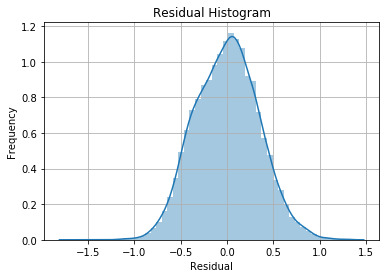

In [12]:
# Plot the histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

It can be noted that the residuals are normally distributed which is an assumption that we have a linear regression.

### Model 2 - Linear Regression - adding KMeans clusters and a polynomial feature 

In an attempt to improve model 1, are created two new features. The new features are:
- **KMeans** for the **zipcode** variable to find clusters of houses by zipcode.
- Create a new polynomial feature obtained by squaring the variable bedrooms: **bedrooms_sqr** = bedrooms * bedrooms. <br>
By computing this feature, it increases the separation between a small number of bedrooms (e.g. 1) and a higher 
number of bedrooms (e.g. 4) since 1 squared is 1, but 4 squared is 16. Consequently this feature will mostly affect houses with
many bedrooms.

In this model will be also included two other features from the dataset - **view and waterfront** - identified during Hypothesis Simulation in 
Milestone 2 as having potential predictive power.

#### Create new features

In [13]:
# Apply K-Means and add the cluster labels to the dataset

# Create a dataframe using some of the columns except the expert label
X = house_price.loc[:, ["zipcode"]] 

# Call the KMeans function from the sklearn module, using two number of clusters
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
# Labels returned by KMeans
Y = kmeans.fit_predict(X)  
# Cluster centers returned by KMeans
C = kmeans.cluster_centers_    
# Add the cluster label to the dataset
house_price['KMeans_Cluster'] = Y

# Create bedrooms squared
house_price['bedrooms_sqr'] = house_price['bedrooms'] **2

In [ ]:
# Check the dataframe
#house_price.head()

For model 2, in addition to the features used for model 1, are also used the following features: 
**view, waterfront, KMeans_Cluster and bedrooms_sqr**.

#### Build Model 2 using Sklearn

In [14]:
# Pull out variables of interest
x = house_price[['sqft_living_scale', 'sqft_living15_scale', 'bedrooms', 'grade', 'condition', 'view', 'waterfront', 'KMeans_Cluster', 'bedrooms_sqr']]
y = house_price['log_price']

# Convert x to a Numpy array 
x = x.to_numpy()

# Build the model
regression_model = LinearRegression()
# Fit the data (train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

print('Intercept: \n', regression_model.intercept_)            
print('Coefficients: \n', regression_model.coef_)              
print('R squared: %.4f \n' % regression_model.score(x, y))

Intercept: 
 11.905815722059248
Coefficients: 
 [ 0.16942067  0.05781036 -0.18954398  0.16287449  0.09463578  0.07800463
  0.3704622  -0.1499408   0.02554209]
R squared: 0.6310 



#### Build Model 2 using Statsmodels

In [15]:
# Add new created features
ols_model = sm.ols(formula = 'log_price ~ sqft_living_scale + sqft_living15_scale + bedrooms + grade + condition + view + waterfront + KMeans_Cluster + bedrooms_sqr', data=house_price)

results = ols_model.fit()
y_output = house_price['log_price']

# Get slope (m) and y-intercept (b)
print('Intercept, Slopes : \n{}'.format(results.params))

Intercept, Slopes : 
Intercept              11.905816
sqft_living_scale       0.169421
sqft_living15_scale     0.057810
bedrooms               -0.189544
grade                   0.162874
condition               0.094636
view                    0.078005
waterfront              0.370462
KMeans_Cluster         -0.149941
bedrooms_sqr            0.025542
dtype: float64


Print the evaluation metrics.

In [16]:
# Additional Statistics
print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())


SSE, SST, SSR, and RMSE:
SSE: 3782.7984529196015
SST: 5995.094942910212
SSR: 2212.2964899906106
RMSE: 20.501486268397443
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     4104.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        08:09:48   Log-Likelihood:                -6036.7
No. Observations:               21613   AIC:                         1.209e+04
Df Residuals:                   21603   BIC:                         1.217e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]


It can be noted that the Intercept and all the coeficients have the p-value 0 and the confidence interval for each parameter 
does not include zero. The null hypothesis can be rejected.
Both R-squared and adjusted R-squared have a value of 0.631, higher than the R-squared for model 1 (0.57). This means that the
new parameters included in model 2 add value to the model. Also, the AIC score has a value of 12090, lower than 
AIC value of 15070 obtained for model 1.

Text(0.5, 1.0, 'Residual Histogram')

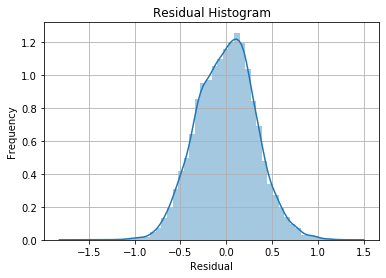

In [17]:
# Plot the histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

The histogram shows that the residuals have a normal distribution.

### Model 3 - Linear Regression - adding an interaction term and a polynomial feature

The third model included two new features. The new features are:
- another polynomial term, bathrooms squared: **bathrooms_sqr** = bathrooms * bathrooms
- an interaction term: **beds_baths** = bedrooms x bathrooms

#### Create new features

In [18]:
# Create bathrooms squared
house_price['bathrooms_sqr'] = house_price['bathrooms'] **2

# Create bedrooms*bathrooms 
house_price['beds_baths'] = house_price['bedrooms'] * house_price['bathrooms']

The new features **bathrooms_sqr** and **beds_baths** are added to the other parameters in model 2.

#### Build Model 3 using Sklearn

In [19]:
# Pull out variables of interest
x = house_price[['sqft_living_scale', 'sqft_living15_scale', 'bedrooms', 'grade', 'condition', 'view', 'waterfront', 'KMeans_Cluster', 'bedrooms_sqr', 'bathrooms_sqr', 'beds_baths']]
y = house_price['log_price']

# Convert x to a Numpy array 
x = x.to_numpy()

# Build the model
regression_model = LinearRegression()
# Fit the data (train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

print('Intercept: \n', regression_model.intercept_)            
print('Coefficients: \n', regression_model.coef_)              
print('R squared: %.4f \n' % regression_model.score(x, y))

Intercept: 
 11.894910077548625
Coefficients: 
 [ 0.16826392  0.06021409 -0.18502712  0.16147852  0.09593919  0.07717437
  0.36397002 -0.14952917  0.03406508  0.02589264 -0.0308841 ]
R squared: 0.6317 



#### Build Model 3 using Statsmodels

In [20]:
# Add new created features
ols_model = sm.ols(formula = 'log_price ~ sqft_living_scale + sqft_living15_scale + bedrooms + grade + condition + view + waterfront + KMeans_Cluster + bedrooms_sqr + bathrooms_sqr + beds_baths', data=house_price)

results = ols_model.fit()
y_output = house_price['log_price']

# Get slope (m) and y-intercept (b)
print('Intercept, Slopes : \n{}'.format(results.params))

Intercept, Slopes : 
Intercept              11.894910
sqft_living_scale       0.168264
sqft_living15_scale     0.060214
bedrooms               -0.185027
grade                   0.161479
condition               0.095939
view                    0.077174
waterfront              0.363970
KMeans_Cluster         -0.149529
bedrooms_sqr            0.034065
bathrooms_sqr           0.025893
beds_baths             -0.030884
dtype: float64


In [21]:
# Additional Statistics
print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())


SSE, SST, SSR, and RMSE:
SSE: 3786.9847889669873
SST: 5995.094942910212
SSR: 2208.1101539432248
RMSE: 18.55455050524114
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     3368.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        08:11:52   Log-Likelihood:                -6016.2
No. Observations:               21613   AIC:                         1.206e+04
Df Residuals:                   21601   BIC:                         1.215e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-

The resuts show that the Intercept and the coefficients are all significant: the p_values are very small (zero) and the confidence
intervals do not include zero. The R-squared and adjusted R-squared have basically the same values of 0.632 as for model 2.
RMSE is ~ 18 compared with RMSE of ~ 20 for model 2. 

Text(0.5, 1.0, 'Residual Histogram')

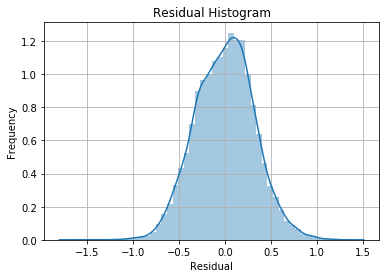

In [22]:
# Plot the histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

The histogram of the residuals has a normal distribution.

Based on the results for model 3, it can be noted that adding the last two new features did not improve too much model 2. Next
it will be used model 2 for building models using regularization.

### Model 4 - Ridge Regression

Linear regression works by selecting coefficients for each independent variable that minimizes a loss function. However, if the
coefficients are too large, it can lead to model over-fitting on the training dataset which will not generalize well on the 
unseen data. To overcome this shortcoming, it is used regularization which penalizes large coefficients. 
Below are tried Ridge Regression and LASSO Regression as regularization to improve the results for model 2.
For both these models, because the target is not normally distributed, it was log-transformed.

Before building the models using sklearn library, it is created a variable for the target and the dataset is split into
training and testing sets.

In [23]:
# Create a variable with the name of the column target 
Label = "log_price"

# Create a list with all the columns in Model 2
cols = list(['sqft_living_scale', 'sqft_living15_scale', 'bedrooms', 'grade', 'condition', 'view', 'waterfront', 'KMeans_Cluster',  'bedrooms_sqr'])

# Remove the Label column from the columns list
#cols.remove(Label)

# Create a dataframe with all columns (except the label)
X = house_price[cols]
# Create a dataframe only for the label
y = house_price[Label]

# Split the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [24]:
# Print the shape of training and testing datasets
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (17290, 9)
y_train:  (17290,)
X_test:  (4323, 9)
y_test:  (4323,)


In scikit-learn, a ridge regression model is constructed by using the Ridge class. The first line of code below instantiates 
the Ridge Regression model with an alpha value of 0.01. The second line fits the model to the training data.
The model is evaluated by printing the RMSE and R-squared on training and test sets.

In [25]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)  
print ('RMSE and R-squared for training set')
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))   # RMSE training set
print(r2_score(y_train, pred_train_rr))                     # R-squared training set

pred_test_rr= rr.predict(X_test)
print('RMSE and R-squared for test set')
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))     # RMSE test set
print(r2_score(y_test, pred_test_rr))                       # R-squared test set

RMSE and R-squared for training set
0.3201254010371269
0.6284341557958675
RMSE and R-squared for test set
0.31926238552127717
0.6406962654625648


It can be observed that the accuracy values are quite close for training and test sets. The R-squared is just a bit lower for 
train set comparing with model 2. The RMSE value is higher then for model 2.

### Model 5 - Lasso Regression

In scikit-learn, a lasso regression model is constructed by using the Lasso class. The first line of code below instantiates 
the Lasso Regression model with an alpha value of 0.01. The second line fits the model to the training data.
The evaluation metrics are also printed below.

In [26]:
# Lasso Regression
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print ('RMSE and R-squared for training set')
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print('RMSE and R-squared for test set')
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

RMSE and R-squared for training set
0.3235574155741596
0.6204244502946081
RMSE and R-squared for test set
0.32197375209907636
0.6345675077840349


It can be observed that the accuracies for train and test sets are very close together for Lasso regression.
The RMSE value for train set is higher than for model 2. The R-squared is slightly lower than R-squared for model 2. 

There are other iterations that can be done to improve model performance. It was assigned the value of alpha to be 0.01, but
this can be altered by hyper parameter tuning to arrive at the optimal alpha value. Cross-validation can also be tried along 
with feature selection techniques. 

### Conclusion

Using the Exploratory Data Analysis and Hypothesis Simulation results obtained in Milestone 1 and 2 for King County house
dataset, were built several regression models for predicting house prices. The first linear regression model used the features
identified during EDA in Milestone 1. The evaluation metric R-squared was not very high. Trying to improve it, were built two 
other models using enhancement techniques. These included calculating polynomial features, interaction terms and creating 
clusters by applying the KMeans. The second model had a higher R-squared value, meaning that the new
features added value to the model. The third model, although had all the coeficients significant, did not have a higher R-squared
comparing with model 2. Overall, the second model performed much better. It was also tried to improve model 2
by using regularization techniques such as Ridge and Lasso regressions. Although the resulted models had close accuracies 
for both train and test sets, they could still be further improved by tunning the hyper parameter and other techniques.